In [1]:
from kervis.utils import Model
from kervis.kernels import VertexHistogram, EdgeHistogram, ShortestPath, Graphlet, WeisfeilerLehman

In [2]:
kernel = Graphlet()
model = Model(kernel, "SVM", "MUTAG")

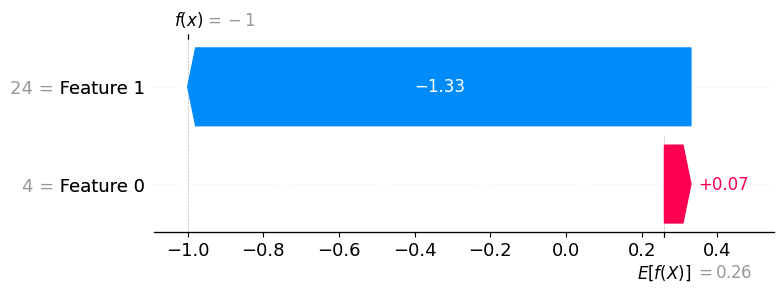

In [3]:
model.waterfall_plot(0)

In [4]:
import networkx as nx

In [5]:
model.kernel.X

array([[ 6., 37.],
       [ 4., 25.],
       [ 4., 25.],
       [ 8., 50.],
       [ 4., 17.],
       [14., 70.],
       [ 5., 29.],
       [ 8., 42.],
       [ 4., 23.],
       [ 7., 38.],
       [ 6., 38.],
       [ 9., 52.],
       [10., 56.],
       [ 5., 26.],
       [ 8., 49.],
       [10., 57.],
       [ 4., 18.],
       [ 7., 40.],
       [ 4., 24.],
       [ 7., 40.],
       [ 6., 32.],
       [ 7., 38.],
       [10., 62.],
       [14., 85.],
       [ 7., 38.],
       [ 5., 21.],
       [10., 62.],
       [ 7., 38.],
       [11., 53.],
       [10., 61.],
       [10., 57.],
       [10., 46.],
       [12., 48.],
       [ 4., 24.],
       [ 7., 38.],
       [ 5., 27.],
       [ 4., 27.],
       [ 4., 26.],
       [ 5., 29.],
       [ 4., 25.],
       [ 7., 38.],
       [ 5., 25.],
       [ 8., 49.],
       [ 6., 37.],
       [ 4., 18.],
       [10., 62.],
       [10., 54.],
       [ 6., 36.],
       [ 8., 42.],
       [ 6., 32.],
       [12., 70.],
       [12., 70.],
       [ 8.,

In [9]:
len(model.find_features(1, 0))

4